## Интеллектуальный анализ данных – весна 2024
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html).

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования. Используйте [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).

In [30]:
if (X.isnull().sum().sum() == 0):
  print("Нет пропущенных значений")
else:
  print("Есть пропущенные значения")

Нет пропущенных значений


In [31]:
if (X.select_dtypes(include=['object']).empty):
  print("Нет категориальных переменных")
else:
  print("Есть категориальные переменные")

Нет категориальных переменных


**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

Используйте аргумент `stratify` при разбиении. Почему это важно?

In [32]:
from sklearn.model_selection import train_test_split

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3)
X_train

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
12,13.75,1.73,2.41,16.0,89.0,2.60,2.76,0.29,1.81,5.60,1.15,2.90,1320.0
30,13.73,1.50,2.70,22.5,101.0,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285.0
36,13.28,1.64,2.84,15.5,110.0,2.60,2.68,0.34,1.36,4.60,1.09,2.78,880.0
31,13.58,1.66,2.36,19.1,106.0,2.86,3.19,0.22,1.95,6.90,1.09,2.88,1515.0
120,11.45,2.40,2.42,20.0,96.0,2.90,2.79,0.32,1.83,3.25,0.80,3.39,625.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0
114,12.08,1.39,2.50,22.5,84.0,2.56,2.29,0.43,1.04,2.90,0.93,3.19,385.0
152,13.11,1.90,2.75,25.5,116.0,2.20,1.28,0.26,1.56,7.10,0.61,1.33,425.0
136,12.25,4.72,2.54,21.0,89.0,1.38,0.47,0.53,0.80,3.85,0.75,1.27,720.0


Аргумент *stratify* позволяет сохранить пропорции классов в тестовой и обучающей выборках такими, какие они были в исходном датасете. Это особенно важно при классификации, так как может иметься дисбаланс классов, который хочется сохранить как в тестовой, так и в обучающей выборке для лучшей репрезентивности

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [37]:
scaler = StandardScaler() # стандартное масштабирование: центрирование (вычитание среднего) + нормирование (деление на стандартное отклонение)
# в результате этого выборка имеет единичную дисперсию и нулевое матожидание
X_train_scaler = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaler = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)
X_train_scaler

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.982686,-0.527640,0.173598,-1.087543,-0.727661,0.491455,0.791460,-0.596717,0.354587,0.255419,0.857462,0.437825,1.863180
1,0.957937,-0.745511,1.255504,0.839386,0.063252,1.131923,1.306553,-0.596717,1.343233,0.297587,1.032095,0.159563,1.749108
2,0.401078,-0.612894,1.777803,-1.235769,0.656436,0.491455,0.707363,-0.170491,-0.425924,-0.166255,0.595512,0.262081,0.429136
3,0.772317,-0.593949,-0.012937,-0.168547,0.392799,0.907759,1.243480,-1.193434,0.597412,0.803596,0.595512,0.408534,2.498722
4,-1.863482,0.107025,0.210905,0.098259,-0.266295,0.971806,0.822996,-0.340981,0.389276,-0.735516,-0.670576,1.155447,-0.401958
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,0.772317,0.277533,1.218197,1.432287,0.326889,-1.189771,-1.226864,0.255736,-0.113719,1.545743,-0.932526,-1.173163,0.005441
120,-1.083879,-0.849710,0.509362,0.839386,-1.057208,0.427409,0.297391,0.596717,-0.980953,-0.883102,-0.103019,0.862540,-1.184164
121,0.190709,-0.366606,1.442039,1.728737,1.051893,-0.149012,-0.764332,-0.852453,-0.079030,0.887931,-1.500083,-1.861495,-1.053796
122,-0.873510,2.304674,0.658590,0.394710,-0.727661,-1.461970,-1.615812,1.449170,-1.397225,-0.482511,-0.888867,-1.949367,-0.092335


In [40]:
knns = []

def train_and_print_proportions(X_train_scaler, y_train, X_test_scaler, y_test, n_neighbors):
  print(n_neighbors, end='\t')
  knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric='euclidean')
  knn.fit(X_train_scaler, y_train)
  knns.append(knn)
  y_pred = knn.predict(X_train_scaler)
  print(f"{accuracy_score(y_train, y_pred):.2f}", end='\t')
  y_pred = knn.predict(X_test_scaler)
  print(f"{accuracy_score(y_test, y_pred):.2f}", end='\n')

neighbors_num = np.array([1, 3, 5, 10, 15, 25])
print("NN\tTrain\tTest")

X_train_scaler_selective = np.asarray(X_train_scaler[['alcohol', 'magnesium']])
X_test_scaler_selective = np.asarray(X_test_scaler[['alcohol', 'magnesium']])

for n_neighbors in neighbors_num:
  train_and_print_proportions(X_train_scaler_selective, y_train, X_test_scaler_selective, y_test, n_neighbors)

NN	Train	Test
1	1.00	0.56
3	0.80	0.63
5	0.78	0.63
10	0.75	0.65
15	0.72	0.63
25	0.69	0.69


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

In [41]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [42]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов.
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново.
6. Построение графика может занять некоторое время – придётся немного подождать!

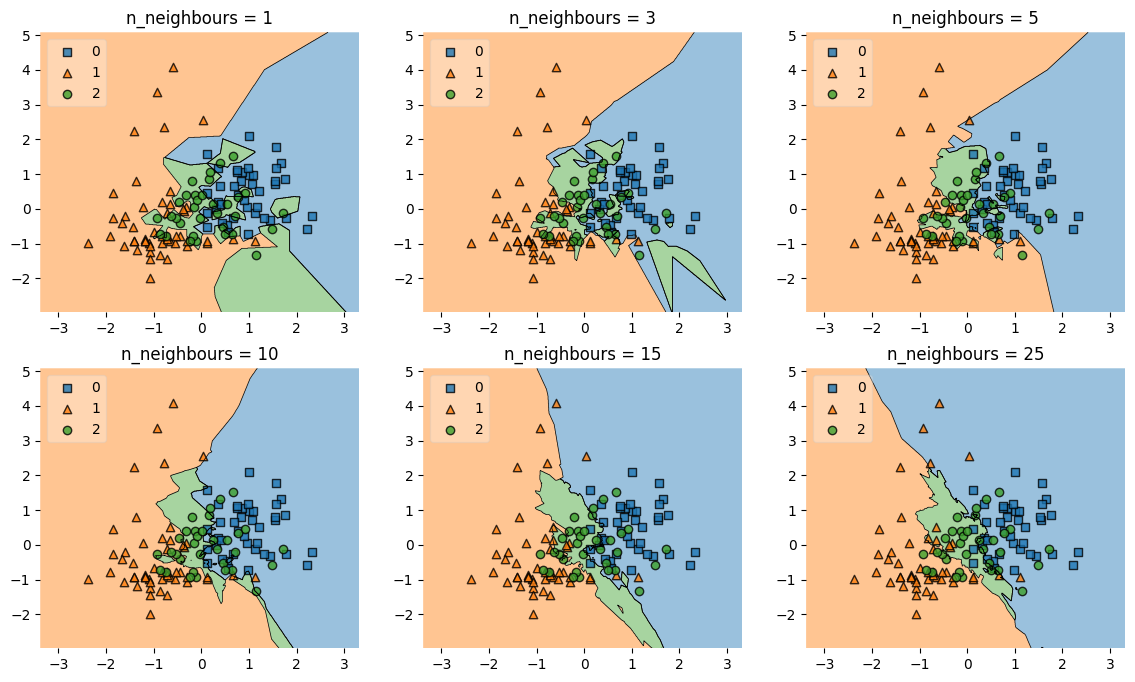

In [ ]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
iterable1 = [0, 1]
iterable2 = [0, 1, 2]

gs = gridspec.GridSpec(2, 3) # 2 строки, 3 столбца

fig = plt.figure(figsize=(14,8))

labels = ['n_neighbours = 1', 'n_neighbours = 3', 'n_neighbours = 5', 'n_neighbours = 10', 'n_neighbours = 15', 'n_neighbours = 25']
for knn, lab, grd in zip(knns, # уже обученные классификаторы
                         labels,
                         itertools.product(iterable1, iterable2)):
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=np.asarray(pd.DataFrame(X_train_scaler)[[0, 4]]), y=y_train, clf=knn, legend=2)
    plt.title(lab)

plt.show()

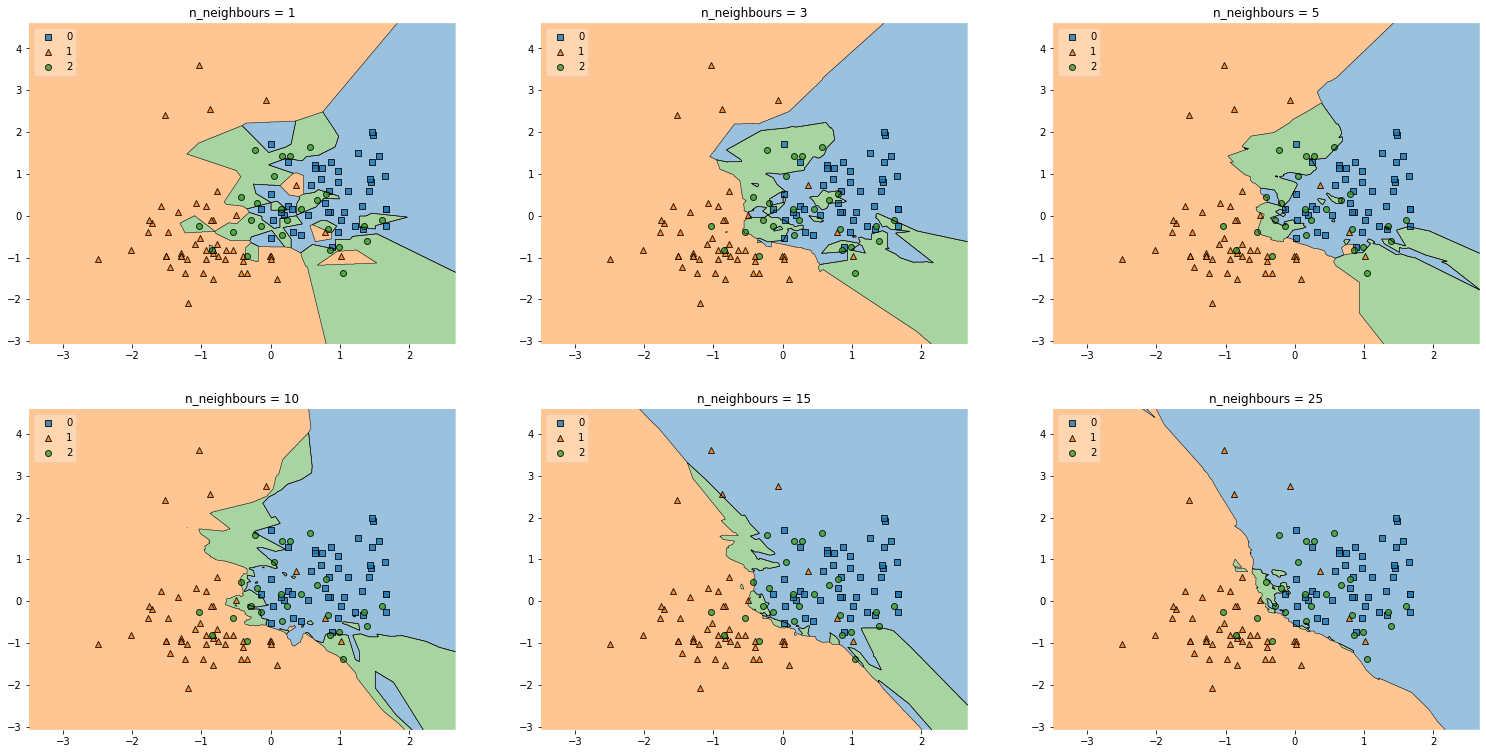

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности. Какие из результатов явно говорят о переобучении модели? Почему?

В задаче 1.3 мы получили такие данные accuracy_score в зависимости от числа соседей k в алгоритме kNN:  

NN	Train	Test  
1	1.00	0.56  
3	0.80	0.63  
5	0.78	0.63  
10	0.75	0.65  
15	0.72	0.63  
25	0.69	0.69  

Нас всегда интересует метрика качества на тестовой выборке, и тут в случае 25 соседей она максимальна, так что следует выбрать алгоритм 25 ближайших соседей. Этот же результат подтверждается решающей поверхностью для k=25 в задаче 1.5. В таком случае решающие поверхности более равномерные и имеют четкие разделяющие границы, а также на графике нет "островов", что говорит о хорошем качестве классификации данных

### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

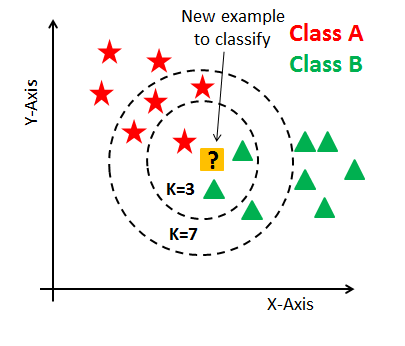

In [43]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k: int):
        self.k = k

    def fit(self, X, y):
      self.X = X
      self.y = y

    def predict(self, X):
      ans = []
      for x in X:
        data = zip(self.X, self.y)
        sorted_data = sorted(data, key=lambda el: self.count_distance(x, el[0]))
        classes = []
        for i in range(0, self.k):
          classes.append(sorted_data[i][1])
        ans.append(Counter(classes).most_common(1)[0][0])

      return np.array(ans)

    def count_distance(self, x, y):
      return np.linalg.norm(x - y)

In [44]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [45]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

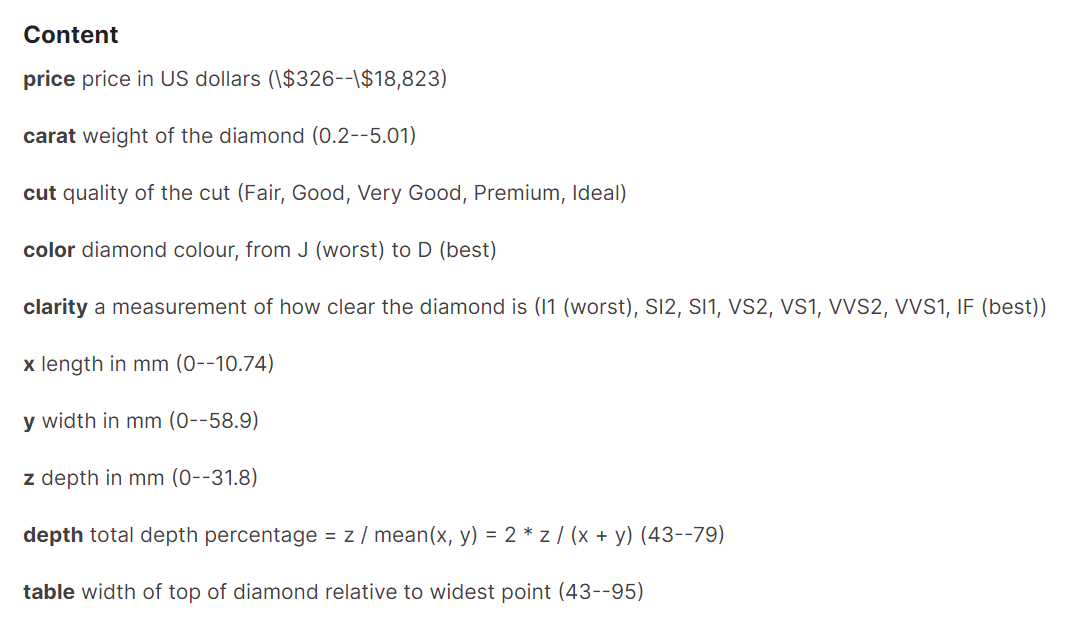

In [46]:
! unzip sample_data/archive.zip # для этого archive.zip должен быть подгружен в папку content/sample_data (скачать можно с Kaggle)

Archive:  sample_data/archive.zip
replace diamonds.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [64]:
data = pd.read_csv('diamonds.csv')
print(data.shape)
data.head(5)

(53940, 11)


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.2 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их.
Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [65]:
if (data.isnull().sum().sum() == 0):
  print("Нет пропущенных значений")
else:
  print("Есть пропущенные значения")

Нет пропущенных значений


Среди бессмысленных столбцов могу разве что выделить первый (под названием "Unnamed: 0"). Понимаю, что это была индексация записей, но она у нас по умолчанию есть, да и в целом она не является признаком, так что избавимся от этого столбца

In [66]:
data.drop(columns=['Unnamed: 0'], inplace=True)
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


**Задача 3.2 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [67]:
pd.DataFrame(data.corr()['price'])

<ipython-input-67-000987a1fc09>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pd.DataFrame(data.corr()['price'])


,price
carat,0.921591
depth,-0.010647
table,0.127134
price,1.000000
x,0.884435
y,0.865421
z,0.861249


По посчитанной матрице выборочных корреляций видно, что высокую корреляцию с зависимой переменной (price) имеют признаки 'x', 'y', 'z', 'carat' (их описания можно посмотреть на скрине выше)

**Задача 3.3 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [68]:
categorical_variables = list(data.select_dtypes(include=['object']).columns)
real_variables = list(data.select_dtypes(include=['float64']).columns)
real_variables

['carat', 'depth', 'table', 'x', 'y', 'z']

In [69]:
encoded_data = pd.get_dummies(data, drop_first=True) # удаляем первый столбец в каждой категории во избежание проблем мультиколлинеарности
encoded_data

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,1,0,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,1,...,1,0,0,0,0,1,0,0,0,0


**Задача 3.4 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3. Не забудьте про параметр `stratify`.

In [70]:
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = encoded_data.drop(columns=['price'])
y = encoded_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # параметр stratify тут не указываем, так как
# целевая переменная является метрической, а не категориальной
X_train

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
19497,1.21,61.3,57.0,6.92,6.87,4.23,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
31229,0.31,62.0,56.0,4.38,4.36,2.71,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
22311,1.21,62.4,57.0,6.75,6.83,4.24,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
278,0.81,62.6,55.0,5.92,5.96,3.72,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
6646,0.79,61.7,56.0,5.94,5.95,3.67,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,1.05,62.4,59.0,6.48,6.51,4.05,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
44732,0.47,61.0,55.0,5.03,5.01,3.06,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
38158,0.33,60.3,58.0,4.49,4.46,2.70,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
860,0.90,62.8,59.0,6.13,6.03,3.82,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0


**Задача 3.5 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [71]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer([
        ('scaleRealVariables', StandardScaler(), real_variables)
    ], remainder='passthrough') # https://stackoverflow.com/questions/38420847/apply-standardscaler-to-parts-of-a-data-set

X_train_scaled = pd.DataFrame(ct.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(ct.transform(X_test), columns=X_test.columns)
X_train_scaled

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.862659,-0.311437,-0.207099,1.055581,0.986556,0.968253,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-1.029889,0.178549,-0.656213,-1.207734,-1.202544,-1.168276,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.862659,0.458541,-0.207099,0.904099,0.951670,0.982309,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.021527,0.598537,-1.105327,0.164512,0.192898,0.251391,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.020530,-0.031445,-0.656213,0.182333,0.184176,0.181110,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37753,0.526206,0.458541,0.691128,0.663511,0.672581,0.715243,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
37754,-0.693436,-0.521432,-1.105327,-0.628540,-0.635646,-0.676312,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
37755,-0.987832,-1.011418,0.242014,-1.109717,-1.115329,-1.182333,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
37756,0.210782,0.738533,0.691128,0.351636,0.253949,0.391952,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


**Задача 3.6 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [72]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train_scaled, y_train)

train_pred = model.predict(X_train_scaled)
test_pred = model.predict(X_test_scaled)

print(f"Среднеквадратичная ошибка на тренировочной выборке: {mean_squared_error(y_train, train_pred)}")
print(f"Среднеквадратичная ошибка на тестовой выборке: {mean_squared_error(y_test, test_pred)}")

Среднеквадратичная ошибка на тренировочной выборке: 1290541.9147450614
Среднеквадратичная ошибка на тестовой выборке: 1244765.4357158695


**Задача 3.7 (0.2 балла)** Изучите [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [73]:
def print_linreg_equation(coefs):
  predictors = list(X_train_scaled.columns)

  print("Уравнение регрессии: ")

  for i in range(0, coefs.size):
    if (i == coefs.size - 1):
      print(f"{coefs[i]}*{predictors[i]}")
    else:
      print(f"{coefs[i]}*{predictors[i]}", end = ' + \n')

print_linreg_equation(model.coef_)

print("\n\n\nВещественные переменные: ")
real_variables

Уравнение регрессии: 
5338.6156706147885*carat + 
-90.1738170334196*depth + 
-60.33227991027331*table + 
-1100.4188500393068*x + 
-6.45891672053097*y + 
-34.2589446208815*z + 
595.5210801260575*cut_Good + 
846.1962575490013*cut_Ideal + 
777.7699627551737*cut_Premium + 
743.3013602895841*cut_Very Good + 
-217.0289677373036*color_E + 
-273.30397584051707*color_F + 
-500.1602381768932*color_G + 
-998.6346691711666*color_H + 
-1476.0842333201992*color_I + 
-2381.989788469752*color_J + 
5459.037299756213*clarity_IF + 
3751.7096712587204*clarity_SI1 + 
2781.9405481388126*clarity_SI2 + 
4657.834307077786*clarity_VS1 + 
4336.72558297791*clarity_VS2 + 
5101.335181071201*clarity_VVS1 + 
5028.295530436609*clarity_VVS2



Вещественные переменные: 


['carat', 'depth', 'table', 'x', 'y', 'z']

Среди наших 6 вещественных переменных лишь оценки коэффициентов переменных 'carat' и 'x' по модулю на порядок превышают оценки прочих вещественных переменных ($\approx 5338.6$ и $\approx -1100.4$ соответственно)

**Задача 3.8 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [74]:
from sklearn.linear_model import Ridge, Lasso

lasso_model = Lasso(alpha=10)

lasso_model.fit(X_train_scaled, y_train)

print_linreg_equation(lasso_model.coef_)

Уравнение регрессии: 
4756.602190121012*carat + 
-153.12271503755704*depth + 
-109.86857586573221*table + 
-681.2753328336606*x + 
-0.0*y + 
-6.279438941365684*z + 
-0.0*cut_Good + 
163.90465694763967*cut_Ideal + 
76.63659114950055*cut_Premium + 
90.90731612860809*cut_Very Good + 
0.0*color_E + 
-0.0*color_F + 
-129.22396242500093*color_G + 
-608.5555637939126*color_H + 
-995.8904566353588*color_I + 
-1789.0958175180226*color_J + 
1338.7578245194302*clarity_IF + 
3.5153812505985553*clarity_SI1 + 
-803.6163122409766*clarity_SI2 + 
821.8896049653586*clarity_VS1 + 
569.8997082871381*clarity_VS2 + 
1171.1198087216947*clarity_VVS1 + 
1160.8487390616635*clarity_VVS2


In [75]:
ridge_model = Ridge(alpha=10)

ridge_model.fit(X_train_scaled, y_train)

print_linreg_equation(ridge_model.coef_)

Уравнение регрессии: 
5286.285876305559*carat + 
-93.74631384909335*depth + 
-63.43010551253391*table + 
-1062.0065141702628*x + 
-5.916125957270222*y + 
-33.68999395053706*z + 
618.9711481711463*cut_Good + 
873.580369190818*cut_Ideal + 
801.950615444037*cut_Premium + 
773.3901904487296*cut_Very Good + 
-205.01205658859638*color_E + 
-260.0985965519165*color_F + 
-481.9156572098997*color_G + 
-979.7835967261042*color_H + 
-1450.0082142223164*color_I + 
-2345.505217028074*color_J + 
4854.461972431848*clarity_IF + 
3193.741710834455*clarity_SI1 + 
2231.6865717652076*clarity_SI2 + 
4090.4327041888123*clarity_VS1 + 
3775.032112493052*clarity_VS2 + 
4520.01616635848*clarity_VVS1 + 
4454.315817870121*clarity_VVS2


Вышло так, что модель, обученная на Ridge регуляризации, получилась примерно такой же с точки зрения модулей коэффициентов весов, как и исходная модель, обученная без регуляризации вовсе, а вот Lasso сильно улучшила этот показатель, и коэффициенты стали более стабильными, что говорит в пользу того, что в исходной модели мультиколлинеарность проявлялась в сильной степени

**Задача 3.9 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

<Figure size 640x480 with 0 Axes>

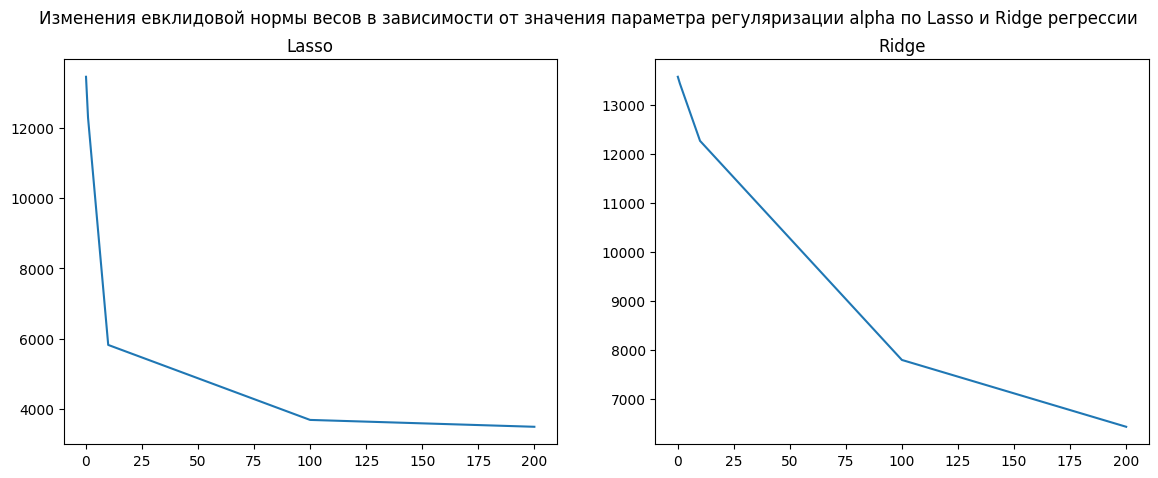

In [76]:
alphas = [0.1, 1, 10, 100, 200]

lasso_coefs_norm = []
ridge_coefs_norm = []

for alpha in alphas:
  tmp_model = Lasso(alpha=alpha)
  tmp_model.fit(X_train_scaled, y_train)
  lasso_coefs_norm.append(np.linalg.norm(tmp_model.coef_))

  tmp_model = Ridge(alpha=alpha)
  tmp_model.fit(X_train_scaled, y_train)
  ridge_coefs_norm.append(np.linalg.norm(tmp_model.coef_))


plt.subplots_adjust(wspace=0.5)
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(alphas, lasso_coefs_norm)
plt.title("Lasso")

plt.subplot(1, 2, 2)
plt.plot(alphas, ridge_coefs_norm)
plt.title("Ridge")

plt.suptitle("Изменения евклидовой нормы весов в зависимости от значения параметра регуляризации alpha по Lasso и Ridge регрессии")
plt.show()

На графиках чётко видно, что Lasso регрессия гораздо агрессивнее уменьшает веса. Это видно как по крутизне графиков, так и по минимально достижимому значению L2-нормы. Так, при $\alpha = 200$ Lasso удалось получить вектор весов, L2-норма которого менее 4000, в то время как Ridge удалось достичь только L2-нормы менее 7000
### Почему Lasso-регрессию часто используют для отбора признаков?
В ходе оптимизации функции потерь в Lasso регрессии накладывается штраф на на сумму абсолютных значений коэффициентов (L1-норма), и в ходе такой оптимизации нередко получается так, что некоторые веса обнуляются, что позволяет довольно легко провести отбор признаков, исключив наименее информативные (то есть те, которые обнулились в процессе обучения). Простота такого метода (просто обучить линейную модель с Lasso регуляризатором, используя встроенную функцию в sklearn и выбрать признаки, веса при которых обнулились) является причиной того, почему этот способ отбора признаков часто используется на практике

**Задача 3.10 (0.5 балла)**
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

In [78]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(alphas=alphas, cv=5) # alphas объявлены в предыдущей ячейке

lasso_cv.fit(X_train_scaled, y_train)
res = pd.DataFrame(lasso_cv.mse_path_)
res['average error'] = res.mean(axis=1)
res['alpha'] = lasso_cv.alphas_
res # по горизонтали альфы, по вертикали значения MSE по каждому фолду, average error - средняя ошибка на всех 5 фолдах

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 537223679.8564453, tolerance: 48476565.465277866
  model = cd_fast.enet_coordinate_descent_gram(


,0,1,2,3,4,average error,alpha
0,2.534744e+06,2.481568e+06,2.460482e+06,2.383135e+06,2.412551e+06,2.454496e+06,200.0
1,2.333106e+06,2.275034e+06,2.272061e+06,2.182157e+06,2.207552e+06,2.253982e+06,100.0
2,1.596081e+06,1.529958e+06,1.593112e+06,1.451439e+06,1.488565e+06,1.531831e+06,10.0
3,1.339925e+06,1.297949e+06,1.343048e+06,1.257371e+06,1.252723e+06,1.298203e+06,1.0
4,1.333980e+06,1.293207e+06,1.348210e+06,1.258380e+06,1.245596e+06,1.295874e+06,0.1


Наименьшая ошибка при $\alpha = 0.1$, значит, при этом значении модель даёт наилучшее качество

In [80]:
lasso_cv.alpha_ # наилучшая альфа

0.1

**Задача 3.11 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [84]:
final_model = Lasso(alpha=0.1)

final_model.fit(X_train_scaled, y_train)

print_linreg_equation(final_model.coef_)

Уравнение регрессии: 
5332.422145303007*carat + 
-91.07303291768476*depth + 
-60.98185264900373*table + 
-1096.8153634183593*x + 
-5.607737612203078*y + 
-33.94442701127661*z + 
585.1790384896515*cut_Good + 
836.1603677362029*cut_Ideal + 
767.6550012200119*cut_Premium + 
733.7359776419518*cut_Very Good + 
-211.66190181096837*color_E + 
-267.9427498216825*color_F + 
-494.2919905106993*color_G + 
-992.5892585227465*color_H + 
-1469.0342958731849*color_I + 
-2373.8279726285805*color_J + 
5402.3964787743525*clarity_IF + 
3699.2130909797334*clarity_SI1 + 
2729.8826626945192*clarity_SI2 + 
4604.228786171147*clarity_VS1 + 
4283.913094587924*clarity_VS2 + 
5046.644984106301*clarity_VVS1 + 
4974.320847599519*clarity_VVS2


В итоге получилось так, что ширина бриллианта в мм (признак 'y') оказалась *неинформативным* признаком, так как в ходе обучения Lasso-регрессии коэффициент при этом признаке почти обнулился. Остальные признаки имеют ненулевые и довольно большие в рамках задачи веса, так что они являются *информативными*. Единственное предположение, почему Lasso-регуляризатор выявил ширину бриллианта как неинформативный признак такое: если представить бриллиант таковым, каким он первый приходит на ум (то есть заостряющийся к низу), то его длина (мера по оси х) равна его ширине (мере по оси y), а в высоту он может быть любым в разумных рамках. Таким образом, нет смысла использовать один и тот же признак дважды. Говоря техническим языком, так Lasso-регуляризатор выявил мультиколлинеарность и исключил её, так как длина и ширина бриллианта сильно коррелированы между собой даже у не очень ровных бриллиантов  

Среди наиболее информативных признаков можно выделить число карат, то есть меру веса бриллианта (1 карат = 0.2 грамма), что, в целом, логично, а также длину бриллианта, что тоже логично, так как это мера размера бриллианта, а также признак 'clarity' - меру чистоты бриллианта, что безусловно тоже является одним из важнейших атрибутов драгоценного камня и несомненно влияет на его стоимость. Причём замечу, что, согласно описанию датасета на Kaggle, (https://www.kaggle.com/datasets/shivam2503/diamonds) наилучшей мерой чистоты является метка IF, значит, по логике коэффициент при этой дамми-переменной должен быть наивысшим, так как бриллиант с такой меткой чистоты в среднем будет стоить дороже. И, если посмотреть на итоговое уравнение, то у нас именно это и получилось (вес равен 5402.396), что является самым большим весом среди остальных дамми-переменных, характеризующих чистоту

**Задача 3.12 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [85]:
initial_pred = model.predict(X_test_scaled)
final_pred = final_model.predict(X_test_scaled)

print(f"Среднеквадратичная ошибка на тестовой выборке на первоначальной модели: {mean_squared_error(y_test, initial_pred)}")
print(f"Среднеквадратичная ошибка на тестовой выборке на финальной модели: {mean_squared_error(y_test, final_pred)}")

Среднеквадратичная ошибка на тестовой выборке на первоначальной модели: 1244765.4357158695
Среднеквадратичная ошибка на тестовой выборке на финальной модели: 1244336.150823827


В итоге ошибки примерно равны на обеих моделях, но все же хоть и незначительно, но все же финальная модель дает меньшую ошибку, так что для предсказаний лучше использовать её. Это обусловлено тем, что финальную модель мы получили проделав определенную работу по сравнению Lasso и Ridge регрессии, а также по выявлению наиболее оптимальной альфы, в то время как первоначальную модель мы просто обучили без всяких регуляризаторов и предварительного анализа, так что, скорее всего, модель, полученная в результате некоторых экспериментов будет более удачной